Examine parameter and error distributions of model fits to Baker et al data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import get_line, set_font_size

FPS = 2
DT = 1/FPS
T = np.arange(61)*DT - 10
T_COLS = [f'IT_{it}' for it in range(61)]

In [2]:
df_lin_param = pd.read_csv('data/simple/pacheco_lin_fit_param.csv')
df_ln_param = pd.read_csv('data/simple/pacheco_ln_fit_param.csv')
df_dyn_param = pd.read_csv('data/simple/pacheco_dyn_fit_param.csv')

df_lin_pred = pd.read_csv('data/simple/pacheco_lin_fit_pred.csv')
df_ln_pred = pd.read_csv('data/simple/pacheco_ln_fit_pred.csv')
df_dyn_pred = pd.read_csv('data/simple/pacheco_dyn_fit_pred.csv')

df_data = pd.read_csv('data/simple/pacheco.csv')

mout = (df_dyn_param['TAU_R'] > 40) | (np.abs(df_dyn_param['X_S']) > 20) | (np.abs(df_dyn_param['X_P']) > 20)

In [3]:
df_data

,EXPT_ID,STIM,FLY,NEUROPIL,NEUROPIL_IDX,RESPONSE_TYPE_LABEL,IT_0,IT_1,IT_2,IT_3,...,IT_51,IT_52,IT_53,IT_54,IT_55,IT_56,IT_57,IT_58,IT_59,IT_60
0,0,S,1,sSADC,0,13,-0.033654,0.039349,-0.090484,0.401704,...,1.082081,0.920516,0.633192,0.459923,0.777835,0.852022,0.777709,0.278367,0.074631,0.042462
1,0,P,1,sSADC,0,13,0.617594,0.378234,0.414807,0.080734,...,0.246901,0.488439,0.480255,0.425880,0.650568,0.628899,0.368041,0.032336,0.248447,-0.126652
2,1,S,1,AMMC,1,13,0.336833,0.408993,0.474425,0.213802,...,1.001931,0.897849,0.874968,0.410459,0.555852,0.387268,0.438035,0.307526,0.391527,0.531009
3,1,P,1,AMMC,1,13,0.168264,-0.182815,-0.143902,0.101796,...,0.702984,0.584333,0.336659,0.414276,0.284469,0.080918,0.384536,0.325093,0.335583,0.242322
4,2,S,1,sSADC,0,13,0.261517,0.033362,0.034890,0.212583,...,0.288560,0.482021,0.431282,0.281125,0.085184,-0.035244,0.125191,0.065407,-0.110486,-0.020802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38067,19033,P,47,GNG,3,18,-0.039356,-0.014598,-0.034997,-0.035381,...,0.153143,0.171215,0.112855,0.084740,0.064839,0.034636,0.019822,0.042430,0.048326,0.051901
38068,19034,S,47,sSADC,0,15,0.710741,0.594676,0.427717,0.166460,...,2.247301,1.373531,1.862249,1.769727,1.958070,2.003307,1.319867,1.124926,1.354274,1.268899
38069,19034,P,47,sSADC,0,15,0.662882,0.455962,0.019223,-0.011819,...,1.422577,1.974313,1.708528,1.429057,1.396340,1.190694,0.925789,0.586538,0.335784,0.296388
38070,19035,S,47,PLP,7,12,0.123877,-0.103292,-0.265331,-0.061722,...,0.086945,0.273224,0.522694,0.491431,0.948518,1.173859,1.000480,0.539625,0.273782,-0.010819


Mean lin fit error: 0.5464
Mean ln fit error: 0.4769
Mean dyn fit error: 0.5861


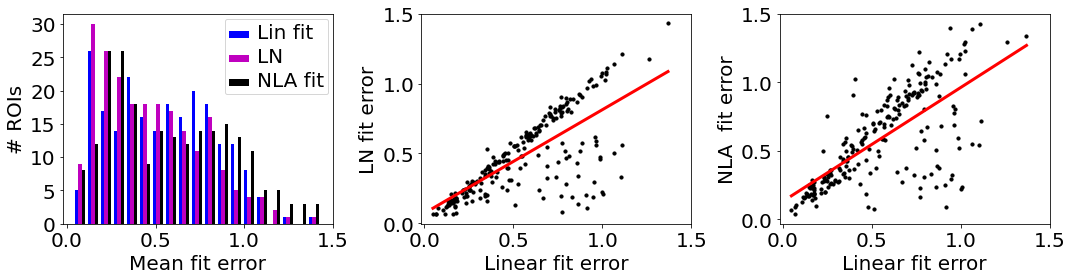

In [15]:
# error distributions
err_min = np.min([df_lin_param['FIT_ERR'].min(), df_ln_param['FIT_ERR'].min(), df_dyn_param['FIT_ERR'].min()])
err_max = np.max([df_lin_param['FIT_ERR'].max(), df_ln_param['FIT_ERR'].max(), df_dyn_param['FIT_ERR'].max()])

fig, axs = plt.subplots(1, 3, figsize=(15, 4), tight_layout=True)
axs[0].hist(
    np.transpose([np.array(df_lin_param['FIT_ERR']), np.array(df_ln_param['FIT_ERR']), np.array(df_dyn_param['FIT_ERR'])]),
    bins=np.linspace(err_min, err_max, 20), color=['b', 'm', 'k'])
axs[0].set_xticks([0, .5, 1, 1.5])
axs[0].set_xlabel('Mean fit error')
axs[0].set_ylabel('# ROIs')
axs[0].legend(['Lin fit', 'LN', 'NLA fit'])

axs[1].scatter(df_lin_param['FIT_ERR'], df_ln_param['FIT_ERR'], s=10, c='k')
axs[1].plot(*get_line(df_lin_param['FIT_ERR'], df_ln_param['FIT_ERR'])[:2], c='r', lw=3)
axs[1].set_xlabel('Linear fit error')
axs[1].set_ylabel('LN fit error')

axs[2].scatter(df_lin_param['FIT_ERR'], df_dyn_param['FIT_ERR'], s=10, c='k')
axs[2].plot(*get_line(df_lin_param['FIT_ERR'], df_dyn_param['FIT_ERR'])[:2], c='r', lw=3)
axs[2].set_xlabel('Linear fit error')
axs[2].set_ylabel('NLA  fit error')

for ax in axs[1:]:
    ax.set_xticks([0, .5, 1, 1.5])
    ax.set_yticks([0, .5, 1, 1.5])
set_font_size(axs, 20) 

print(f'Mean lin fit error: {df_lin_param.FIT_ERR.mean():.4f}')
print(f'Mean ln fit error: {df_ln_param.FIT_ERR.mean():.4f}')
print(f'Mean dyn fit error: {df_dyn_param.FIT_ERR.mean():.4f}')

91 outliers, 133 valid ROIs


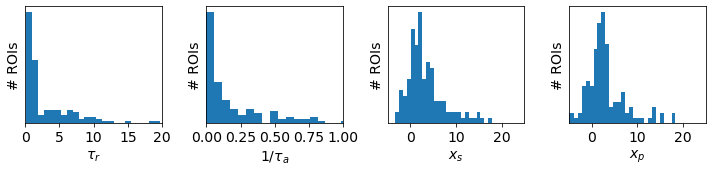

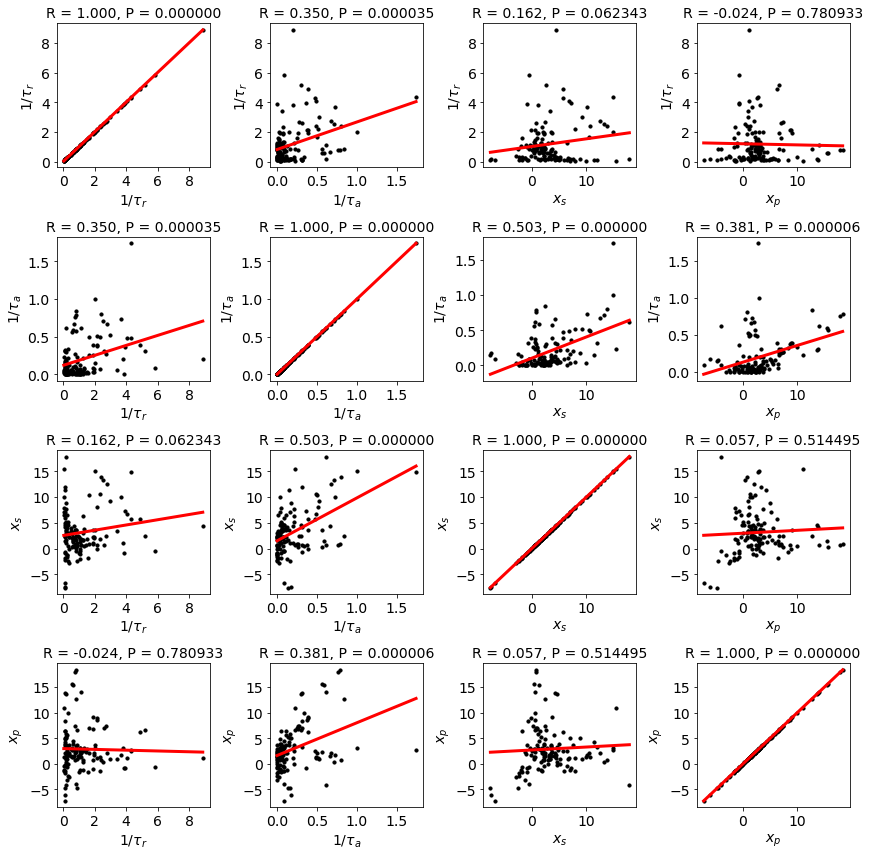

In [5]:
# dynamical fit param distributions
fig, axs = plt.subplots(1, 4, figsize=(10, 2.5), tight_layout=True)
axs[0].hist(df_dyn_param['TAU_R'][~mout], bins=30)
axs[0].set_xlim(0, 20)
axs[0].set_xlabel(r'$\tau_r$')
axs[1].hist(1/df_dyn_param['TAU_A'][~mout], bins=30)
axs[1].set_xlim(0, 1)
axs[1].set_xlabel(r'$1/\tau_a$')
axs[2].hist(df_dyn_param['X_S'][~mout], bins=30)
axs[2].set_xlim(-5, 25)
axs[2].set_xlabel(r'$x_s$')
axs[3].hist(df_dyn_param['X_P'][~mout], bins=30)
axs[3].set_xlim(-5, 25)
axs[3].set_xlabel(r'$x_p$')

for ax in axs:
    ax.set_yticks([])
    ax.set_ylabel('# ROIs')
set_font_size(axs, 14)

print(f'{mout.sum()} outliers, {(~mout).sum()} valid ROIs')

fig, axs = plt.subplots(4, 4, figsize=(12, 12), tight_layout=True)
kparams = ['TAU_R', 'TAU_A', 'X_S', 'X_P']

labels = {'TAU_R': r'$1/\tau_r$', 'TAU_A': r'$1/\tau_a$', 'X_S': r'$x_s$', 'X_P': r'$x_p$'}

rs = np.nan * np.zeros((len(kparams), len(kparams)))

for ckparam_x, kparam_x in enumerate(kparams):
    if kparam_x == 'TAU_A':
        x = 1/df_dyn_param['TAU_A']
    elif kparam_x == 'TAU_R':
        x = 1/df_dyn_param['TAU_R']
    else:
        x = df_dyn_param[kparam_x]
        
    for ckparam_y, kparam_y in enumerate(kparams):
        if kparam_y == 'TAU_A':
            y = 1/df_dyn_param['TAU_A']
        elif kparam_y == 'TAU_R':
            y = 1/df_dyn_param['TAU_R']
        else:
            y = df_dyn_param[kparam_y]

        ax = axs[ckparam_y, ckparam_x]
        ax.scatter(x[~mout], y[~mout], c='k', s=10)
        
        x_ln, y_ln, (slp, icpt, r, p, stderr) = get_line(x[~mout], y[~mout])
        ax.plot(x_ln, y_ln, c='r', lw=3)
        ax.set_xlabel(labels[kparam_x])
        ax.set_ylabel(labels[kparam_y])
        ax.set_title(f'R = {r:.3f}, P = {p:.6f}')
        
        rs[ckparam_x, ckparam_y] = r
        
set_font_size(axs, 14)

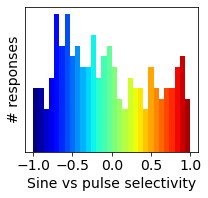

In [6]:
# selectivities
colors = get_spaced_colors('jet', 30, 1/30)
fig, ax = plt.subplots(1, 1, figsize=(3, 2.85), tight_layout=True)
stvys = (np.abs(df_dyn_param['X_P']) - np.abs(df_dyn_param['X_S']))/(np.abs(df_dyn_param['X_S']) + np.abs(df_dyn_param['X_P']))
bins = np.linspace(-1, 1, 31)
binc = .5*(bins[:-1] + bins[1:])
dbin = np.mean(np.diff(bins))
cts = np.histogram(stvys, bins=bins)[0]
ax.bar(binc, cts, width=dbin, color=colors)
set_plot(ax, y_ticks=[], x_label='Sine vs pulse selectivity', y_label='# responses', font_size=14)

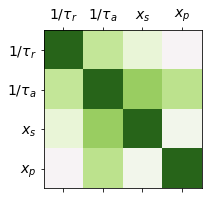

In [7]:
# correlation matrix of fit parameters
fig, ax = plt.subplots(1, 1, figsize=(3, 3), tight_layout=True)
ax.matshow(rs, vmin=-1, vmax=1, cmap='PiYG')
set_plot(ax, x_ticks=range(4), x_tick_labels=[labels[kparam] for kparam in kparams], y_ticks=range(4), y_tick_labels=[labels[kparam] for kparam in kparams], font_size=14)

Plot various sets of trials

In [8]:
def plot_expt_ids(expt_ids):
    fig, axs = plt.subplots(2, 1, figsize=(15, 6), tight_layout=True, sharey=True)
    for cexpt_id, expt_id in enumerate(expt_ids):
        # true responses
        r_s = df_data[(df_data['EXPT_ID'] == expt_id) & (df_data['STIM'] == 'S')].iloc[0][T_COLS]
        r_p = df_data[(df_data['EXPT_ID'] == expt_id) & (df_data['STIM'] == 'P')].iloc[0][T_COLS]
        axs[0].plot(35*cexpt_id + T, r_s, c='k')
        axs[1].plot(35*cexpt_id + T, r_p, c='k')

        # linear fits
        r_lin_s = df_lin_pred[(df_lin_pred['EXPT_ID'] == expt_id) & (df_lin_pred['STIM'] == 'S')].iloc[0][T_COLS]
        r_lin_p = df_lin_pred[(df_lin_pred['EXPT_ID'] == expt_id) & (df_lin_pred['STIM'] == 'P')].iloc[0][T_COLS]
        axs[0].plot(35*cexpt_id + T, r_lin_s, c='c')
        axs[1].plot(35*cexpt_id + T, r_lin_p, c='c')

        # dynamical system fits
        r_dyn_s = df_dyn_pred[(df_dyn_pred['EXPT_ID'] == expt_id) & (df_dyn_pred['STIM'] == 'S')].iloc[0][T_COLS]
        r_dyn_p = df_dyn_pred[(df_dyn_pred['EXPT_ID'] == expt_id) & (df_dyn_pred['STIM'] == 'P')].iloc[0][T_COLS]
        axs[0].plot(35*cexpt_id + T, r_dyn_s, c='m')
        axs[1].plot(35*cexpt_id + T, r_dyn_p, c='m')

        axs[0].axvspan(35*cexpt_id, 35*cexpt_id+10, color='b', alpha=.2)
        axs[1].axvspan(35*cexpt_id, 35*cexpt_id+10, color='r', alpha=.2)

        axs[0].text(35*cexpt_id + 5, -4.5, f'{expt_id}', ha='center')
        axs[1].text(35*cexpt_id + 5, -4.5, f'{expt_id}', ha='center')

        meta = df_data[df_data['EXPT_ID'] == expt_id].iloc[0]
        fit_err_lin = df_lin_param[df_lin_param['EXPT_ID'] == expt_id].iloc[0]['FIT_ERR']
        fit_err_dyn = df_dyn_param[df_dyn_param['EXPT_ID'] == expt_id].iloc[0]['FIT_ERR']
        
        dyn_param = df_dyn_param[df_dyn_param['EXPT_ID'] == expt_id].iloc[0]
        
        print(f'EXPT_ID: {expt_id}, NEUROPIL: {meta.neuropil}, TAU_R: {dyn_param.TAU_R:.3f}, TAU_A: {dyn_param.TAU_A:.3f}, X_S: {dyn_param.X_S:.3f}, X_P: {dyn_param.X_P:.3f}, ERR_LIN: {fit_err_lin:.3f}, ERR_DYN: {fit_err_dyn:.3f}')

    axs[0].set_title('Sine responses')
    axs[1].set_title('Pulse responses')

    for ax in axs:
        ax.axhline(0, ls='--', color='gray')
        ax.xaxis.set_visible(False)
        ax.set_ylim(bottom=-5)

    set_font_size(axs, 14)

EXPT_ID: 0, LINE: R70G01, ROI: somas, USED: False, TAU_R: 6.203, TAU_A: 30.337, X_S: -4.958, X_P: -2.597, ERR_LIN: 0.174, ERR_DYN: 0.275
EXPT_ID: 1, LINE: R70G01, ROI: somas, USED: False, TAU_R: 3.835, TAU_A: 21.821, X_S: -4.164, X_P: -1.472, ERR_LIN: 0.174, ERR_DYN: 0.186
EXPT_ID: 2, LINE: R70G01, ROI: somas, USED: False, TAU_R: 6.017, TAU_A: 15.058, X_S: -6.248, X_P: -2.096, ERR_LIN: 0.170, ERR_DYN: 0.248
EXPT_ID: 3, LINE: R70G01, ROI: somas, USED: False, TAU_R: 6.017, TAU_A: 11.821, X_S: -5.680, X_P: -2.118, ERR_LIN: 0.365, ERR_DYN: 0.456
EXPT_ID: 4, LINE: R70G01, ROI: somas, USED: False, TAU_R: 6.435, TAU_A: 55.496, X_S: -4.416, X_P: -2.864, ERR_LIN: 0.154, ERR_DYN: 0.229
EXPT_ID: 5, LINE: R70G01, ROI: AMMC projection, USED: False, TAU_R: 0.874, TAU_A: 17.222, X_S: -3.644, X_P: -0.938, ERR_LIN: 0.366, ERR_DYN: 0.455


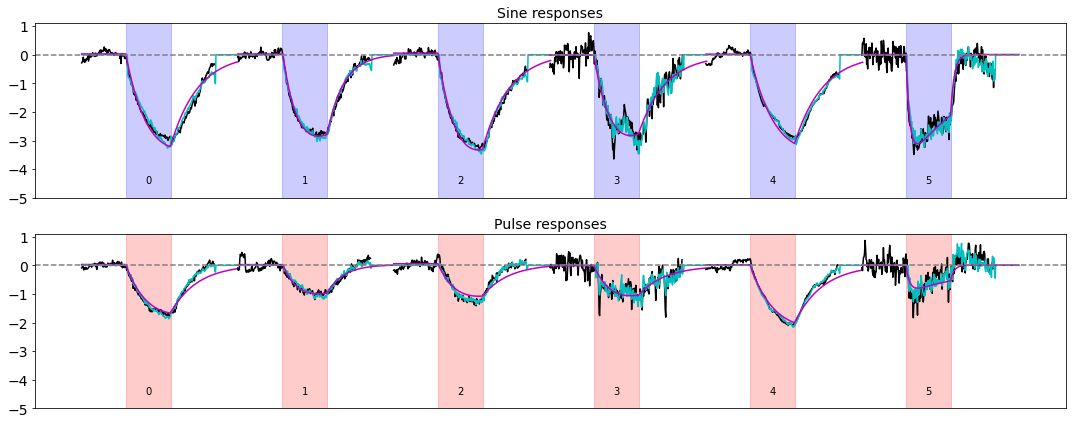

In [9]:
plot_expt_ids(range(6))

EXPT_ID: 217, LINE: VT34811, ROI: wedge projection, USED: False, TAU_R: 1.225, TAU_A: 138.811, X_S: 0.301, X_P: 2.624, ERR_LIN: 0.049, ERR_DYN: 0.070
EXPT_ID: 220, LINE: VT34811, ROI: ascending projection, USED: False, TAU_R: 1.299, TAU_A: 27.643, X_S: 0.098, X_P: 2.457, ERR_LIN: 0.067, ERR_DYN: 0.038
EXPT_ID: 36, LINE: SS27919, ROI: wedge, USED: True, TAU_R: 1.162, TAU_A: 16981.679, X_S: 0.493, X_P: 0.961, ERR_LIN: 0.067, ERR_DYN: 0.092
EXPT_ID: 216, LINE: VT34811, ROI: wedge projection, USED: False, TAU_R: 1.310, TAU_A: 80.594, X_S: 0.343, X_P: 3.156, ERR_LIN: 0.076, ERR_DYN: 0.107
EXPT_ID: 87, LINE: SS29378, ROI: wedge, USED: False, TAU_R: 2.961, TAU_A: 27.369, X_S: 1.008, X_P: 1.163, ERR_LIN: 0.106, ERR_DYN: 0.124
EXPT_ID: 13, LINE: SS16374, ROI: wedge, USED: False, TAU_R: 4.339, TAU_A: 14.485, X_S: 4.607, X_P: 2.059, ERR_LIN: 0.116, ERR_DYN: 0.166
EXPT_ID: 37, LINE: SS27919, ROI: wedge, USED: True, TAU_R: 1.242, TAU_A: 4345.978, X_S: 0.614, X_P: 2.931, ERR_LIN: 0.120, ERR_DYN: 0.1

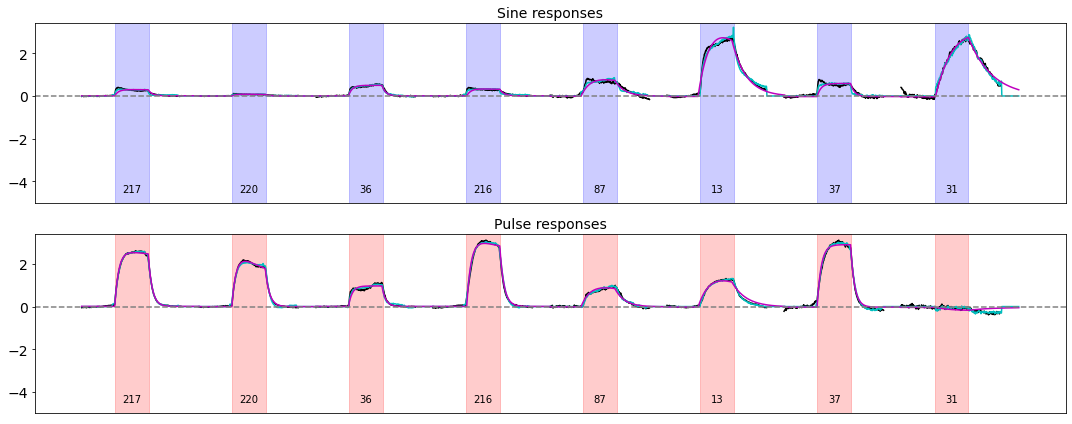

In [10]:
plot_expt_ids(np.array(df_lin_param.sort_values('FIT_ERR')['EXPT_ID'])[:8])

EXPT_ID: 222, LINE: vPN1_split, ROI: somas, USED: False, TAU_R: 5.924, TAU_A: 90.705, X_S: 2.391, X_P: 0.605, ERR_LIN: 0.924, ERR_DYN: 1.206
EXPT_ID: 74, LINE: SS29136, ROI: dorsal projection, USED: True, TAU_R: 0.257, TAU_A: 406.697, X_S: -0.933, X_P: -0.745, ERR_LIN: 0.768, ERR_DYN: 1.221
EXPT_ID: 123, LINE: SS36007, ROI: somas, USED: False, TAU_R: 6.428, TAU_A: 2.112, X_S: 11.498, X_P: 5.024, ERR_LIN: 1.021, ERR_DYN: 1.228
EXPT_ID: 117, LINE: SS35996, ROI: ventral projection, USED: True, TAU_R: 0.261, TAU_A: 4.985, X_S: 1.056, X_P: 3.163, ERR_LIN: 1.018, ERR_DYN: 1.277
EXPT_ID: 211, LINE: SS47509, ROI: VLP projection, USED: True, TAU_R: 2.651, TAU_A: 28.428, X_S: -0.078, X_P: 1.624, ERR_LIN: 1.024, ERR_DYN: 1.293
EXPT_ID: 64, LINE: SS27936, ROI: wedge, USED: False, TAU_R: 22.627, TAU_A: 0.491, X_S: 122.761, X_P: -37.074, ERR_LIN: 1.262, ERR_DYN: 1.294
EXPT_ID: 66, LINE: SS27936, ROI: ascending proj, USED: False, TAU_R: 1.172, TAU_A: 1.123, X_S: 12.064, X_P: -0.794, ERR_LIN: 1.369, E

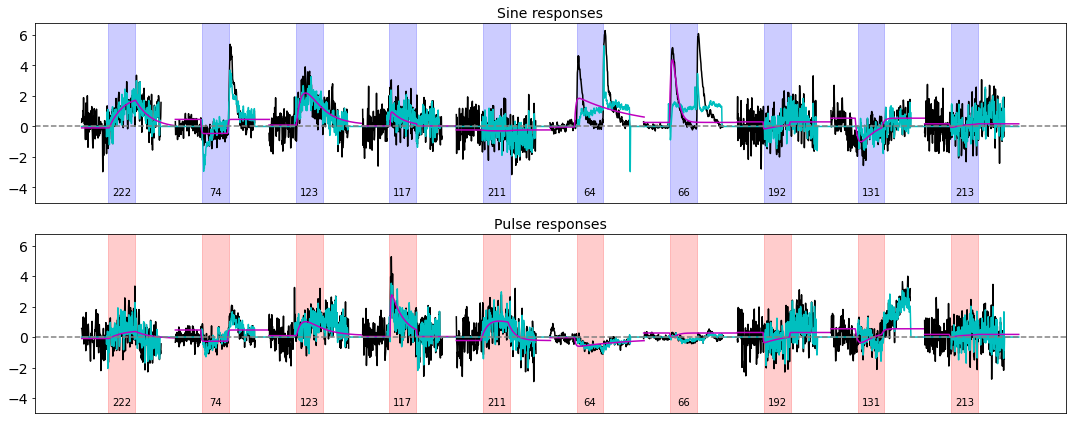

In [11]:
plot_expt_ids(np.array(df_dyn_param.sort_values('FIT_ERR')['EXPT_ID'])[-10:])